In [17]:
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv(r'C:\Users\azhar\time-series\data2016-2019-1.csv')
df.head()

,PoolParticipantID,AssetType,AssetID,hours,MWh,Date,TimeStamp
0,ECLP,IPP,ENC3,Hour1,0.0,2016-01-01,2016-01-01 01:00:00
1,ECLP,IPP,ENC3,Hour2,0.0,2016-01-01,2016-01-01 02:00:00
2,ECLP,IPP,ENC3,Hour3,0.0,2016-01-01,2016-01-01 03:00:00
3,ECLP,IPP,ENC3,Hour4,0.0,2016-01-01,2016-01-01 04:00:00
4,ECLP,IPP,ENC3,Hour5,0.0,2016-01-01,2016-01-01 05:00:00


In [18]:
df1 = df[['TimeStamp','MWh']]

In [19]:
df1.head()

,TimeStamp,MWh
0,2016-01-01 01:00:00,0.0
1,2016-01-01 02:00:00,0.0
2,2016-01-01 03:00:00,0.0
3,2016-01-01 04:00:00,0.0
4,2016-01-01 05:00:00,0.0


In [20]:
df1.columns = ['ds','y']
df1.head()

,ds,y
0,2016-01-01 01:00:00,0.0
1,2016-01-01 02:00:00,0.0
2,2016-01-01 03:00:00,0.0
3,2016-01-01 04:00:00,0.0
4,2016-01-01 05:00:00,0.0


In [21]:

df1.shape

(29928, 2)

In [22]:
df2 = df1.head(17520)
df2.shape

(17520, 2)

In [23]:
df2.head()

,ds,y
0,2016-01-01 01:00:00,0.0
1,2016-01-01 02:00:00,0.0
2,2016-01-01 03:00:00,0.0
3,2016-01-01 04:00:00,0.0
4,2016-01-01 05:00:00,0.0


In [24]:
df3 = df2
df3.head()

,ds,y
0,2016-01-01 01:00:00,0.0
1,2016-01-01 02:00:00,0.0
2,2016-01-01 03:00:00,0.0
3,2016-01-01 04:00:00,0.0
4,2016-01-01 05:00:00,0.0


In [27]:
df3['cap'] = 300
m = Prophet( yearly_seasonality=True, growth='logistic')
m.fit(df3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [29]:
future = m.make_future_dataframe( periods=1440, freq='H')
future['cap']=300
fcst = m.predict(future)

In [30]:
fcst[['ds','yhat']].tail(1440)

,ds,yhat
17520,2017-12-31 00:00:00,-2.973692
17521,2017-12-31 01:00:00,-5.617786
17522,2017-12-31 02:00:00,-6.457962
17523,2017-12-31 03:00:00,-6.617483
17524,2017-12-31 04:00:00,-6.845184
17525,2017-12-31 05:00:00,-6.779232
17526,2017-12-31 06:00:00,-5.359479
17527,2017-12-31 07:00:00,-1.962927
17528,2017-12-31 08:00:00,2.834808
17529,2017-12-31 09:00:00,7.582944


In [31]:
df3.head()

,ds,y,cap
0,2016-01-01 01:00:00,0.0,300
1,2016-01-01 02:00:00,0.0,300
2,2016-01-01 03:00:00,0.0,300
3,2016-01-01 04:00:00,0.0,300
4,2016-01-01 05:00:00,0.0,300


In [32]:
fcst.shape

(18960, 23)

In [33]:
df4 = df1.tail(17720)
df4.shape

(17720, 2)

In [34]:
df5 = df4.iloc[::-1]
df5.tail(100)

,ds,y
12307,2017-05-27 20:00:00,0.0
12306,2017-05-27 19:00:00,0.0
12305,2017-05-27 18:00:00,0.0
12304,2017-05-27 17:00:00,0.0
12303,2017-05-27 16:00:00,0.0
12302,2017-05-27 15:00:00,0.0
12301,2017-05-27 14:00:00,0.0
12300,2017-05-27 13:00:00,0.0
12299,2017-05-27 12:00:00,0.0
12298,2017-05-27 11:00:00,0.0


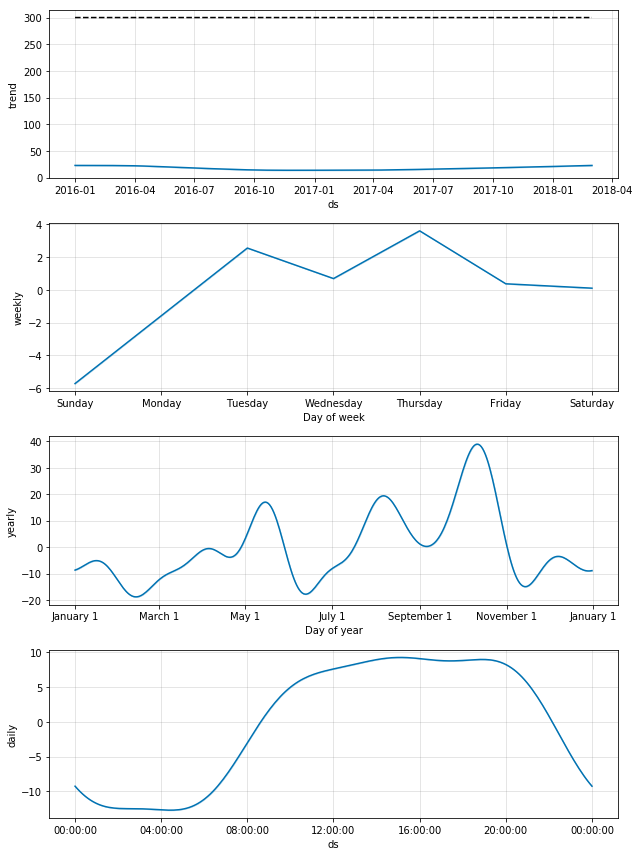

In [35]:
fig = m.plot_components(fcst)

In [36]:
fcst.to_csv(r'C:\Users\azhar\time-series\data2018-fcst.csv', index = None, header=True)